In [1]:
import os
import numpy as np
import tensorflow as tf
import DeformableConvLayerKeras as DCL
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

/home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jlk/anaconda3/envs/

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.
x_test = x_test.reshape(-1, 28, 28, 1) / 255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
batch_size = 100
lr = 1e-3
epochs = 15

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (28, 28, 1)))
dcl = DCL.DeformableConv2D(batch_size = batch_size,
                               filters = 32,
                              kernel_size = (3,3),
                              name = 'layer1',
                              kernel_initializer='glorot_uniform')
model.add(dcl)
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = (3,3),
                                strides = (1,1),
                                padding = 'same',
                                activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = lr), metrics = ['accuracy'])

W0903 09:11:25.920337 139930318169920 deprecation.py:506] From /home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 09:11:25.983031 139930318169920 deprecation.py:506] From /home/jlk/Desktop/JLK/DCN_MNIST/DeformableConvLayerKeras.py:80: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead
W0903 09:11:26.019238 139930318169920 deprecation.py:323] From /home/jlk/Desktop/JLK/DCN_MNIST/DeformableConvLayerKeras.py:127: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions

In [5]:
hist = model.fit(x_train, y_train,
                batch_size = batch_size,
                epochs = epochs,
                verbose = 1,
                validation_data = (x_test, y_test))

W0903 09:11:26.204839 139930318169920 deprecation.py:323] From /home/jlk/anaconda3/envs/jlk_mammo_retina/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 271us/sample - loss: 0.2523 - acc: 0.9235 - val_loss: 0.0928 - val_acc: 0.9709
Epoch 2/15
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0786 - acc: 0.9758 - val_loss: 0.0558 - val_acc: 0.9808
Epoch 3/15
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0570 - acc: 0.9818 - val_loss: 0.0484 - val_acc: 0.9839
Epoch 4/15
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0428 - acc: 0.9865 - val_loss: 0.0445 - val_acc: 0.9848
Epoch 5/15
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0361 - acc: 0.9885 - val_loss: 0.0434 - val_acc: 0.9867
Epoch 6/15
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0476 - val_acc: 0.9856
Epoch 7/15
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0227 - acc: 0.9924 

W0903 09:24:52.840587 139930318169920 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0903 09:24:52.860582 139930318169920 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0903 09:24:52.881512 139930318169920 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0903 09:24:52.902442 139930318169920 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


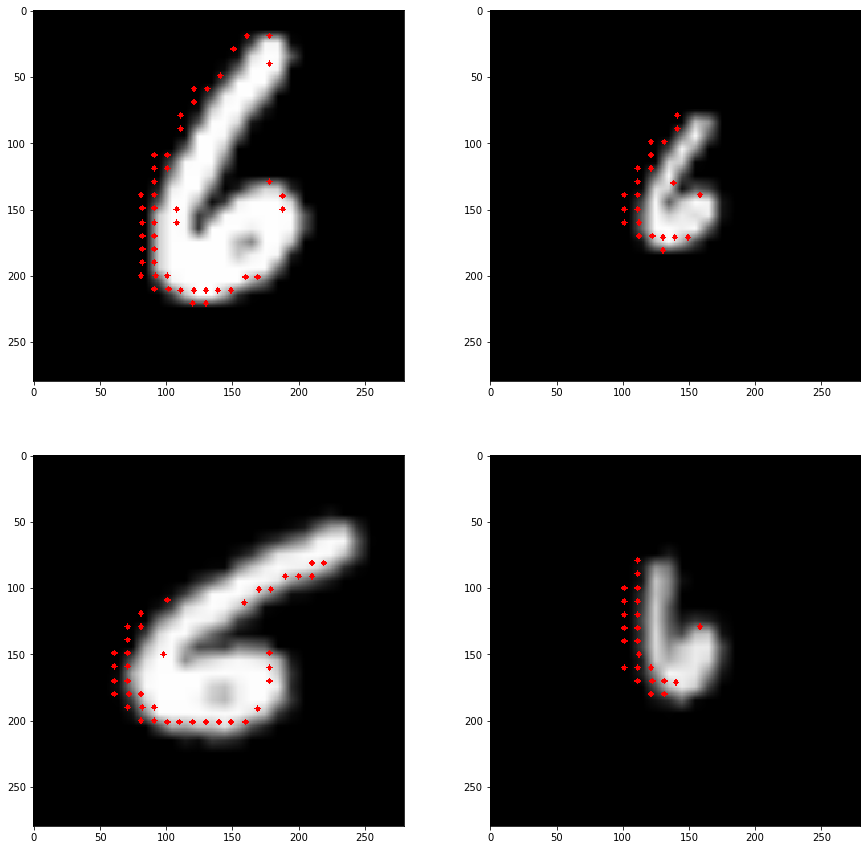

In [19]:
import matplotlib.pyplot as plt
import cv2
cut = 1
idx = 5010
test_image1 = x_test[idx][..., 0]

test_image2 = cv2.resize(test_image1, (14,14))
test_image2 = cv2.copyMakeBorder(test_image2, 7, 7, 7, 7, cv2.BORDER_CONSTANT, value = (0, 0, 0))

M1 = cv2.getRotationMatrix2D((14,14,), -30, 1)
test_image3 = cv2.warpAffine(test_image1, M1, (28,28))

M2 = cv2.getRotationMatrix2D((14,14,), 30, 1)
test_image4 = cv2.warpAffine(test_image2, M2, (28,28))

test_images = np.array([test_image1, test_image2, test_image3, test_image4])[:,:,:,np.newaxis]
offsets = dcl._inference_grid_offset(test_images)

plt.figure(1, figsize = (15, 15))
for idx, (test_image, offset) in enumerate(zip(test_images, offsets)):
    offset_x = offset[..., 0] * 10
    offset_y = offset[..., 1] * 10
    test_image = cv2.resize(test_image, (280, 280))
    test_image = cv2.merge((test_image, test_image, test_image))
    
    for i in range(28):
        for j in range(28):
            x_coordi = offset_x[j, i]
            y_coordi = offset_y[j, i]
            xx = int(x_coordi + i * 10)
            yy = int(y_coordi + j * 10)
            
            if abs(x_coordi) >= cut or abs(y_coordi) >= cut:
                test_image = cv2.circle(test_image, (xx, yy), 2, (255, 0, 0), -1)
    plt.subplot(2,2, idx + 1)
    plt.imshow(test_image)
plt.show()     